# SciPy
![SciPy](https://raw.githubusercontent.com/scipy/scipy-sphinx-theme/master/_static/scipyshiny_small.png)

- Uses numpy as its core
- Numerical methods for:
    + integration
    + solving differential equations
    + optimizing, minimizing 
    + root finding
    + fast fourier transforms
- Contains the CODATA values for many constants of nature
- Mostly build as wrappers around time-proven fortran libraries (fftpack, lapack, fitpack)

# Table of Contents

1. [Physical constants](#physical_constants)
2. [Optimize](#optimize)
    * [General least-squares fitting using `curve_fit`](#curve_fit)
        - [Providing uncertainties and initial guesses](#uncertainties_guesses)
    * [Unbinned likelihood fits using `minimize`](#minimize)
        - [A more complicated example](#minimize_complex)
    * [Exercise 1](#exercise_1)
3. [Fast Fourier Transforms (FFTs)](#fft)
4. [Signal filtering](#filtering)
5. [Integration](#integration)
    * [Function integration](#function_integration)
    * [Sample integration](#sample_integration)
6. [Interpolation](#interpolation)
    * [Linear interpolation](#linear_interpolation)
    * [Cubic spline interpolation](#spline_interpolation)
8. [Special Functions](#special_functions)
    * [Bessel functions](#bessel)
    * [Error function and Gaussian CDF](#erf)
    * [Orthogonal Polynomials](#ortho_polys)

# Notebook Setup (run me first!)

In [2]:
import scipy as sp
import numpy as np

# we will need to plot stuff later
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=physical_constants></a>
# Physical constants

In [2]:
import scipy.constants as const
const.epsilon_0

8.854187817620389e-12

In [3]:
# convert temperatures:
const.convert_temperature(100, old_scale='C', new_scale='K')

373.14999999999998

In [4]:
# more constants (including units and errors)!

for k, v in const.physical_constants.items():
    print(k, ':', v)
    


electron-proton mag. mom. ratio : (-658.2106866, '', 2e-06)
electron-deuteron magn. moment ratio : (-2143.923493, '', 2.3e-05)
mag. constant : (1.2566370614359173e-06, 'N A^-2', 0.0)
shielded helion magn. moment to Bohr magneton ratio : (-0.001158671474, '', 1.4e-11)
atomic unit of electric field gradient : (9.717362356e+21, 'V m^-2', 60000000000000.0)
muon mag. mom. : (-4.49044826e-26, 'J T^-1', 1e-33)
neutron-proton mass difference in u : (0.001388449, '', 5.1e-10)
neutron mass energy equivalent in MeV : (939.5654133, 'MeV', 5.8e-06)
deuteron g factor : (0.8574382311, '', 4.8e-09)
Faraday constant for conventional electric current : (96485.3251, 'C_90 mol^-1', 0.0012)
deuteron mass in u : (2.013553212745, 'u', 4e-11)
Bohr magneton in Hz/T : (13996245042.0, 'Hz T^-1', 86.0)
proton-electron mass ratio : (1836.15267389, '', 1.7e-07)
Planck constant : (6.62607004e-34, 'J s', 8.1e-42)
hertz-inverse meter relationship : (3.3356409519815204e-09, 'm^-1', 0.0)
proton-neutron magn. moment rati

In [5]:
val, unit, uncertainty = const.physical_constants['muon mass energy equivalent in MeV']

val, unit, uncertainty

(105.6583745, 'MeV', 2.4e-06)

<a id=optimize></a>
# Optimize

<a id=curve_fit></a>
## General least-squares fitting using `curve_fit`

Non-linear least-squares with Levenberg-Marquardt numerical minimization.

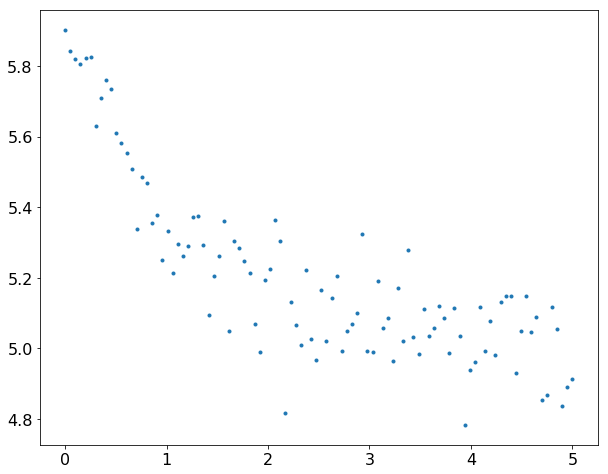

In [8]:
a = -1
b = 5

def f(x, a, b):
    return np.exp(a * x) + b

x = np.linspace(0, 5, 100)
y = f(x, a, b) + np.random.normal(0, 0.1, 100)

plt.plot(x, y, '.', label='data')

In [14]:
from scipy.optimize import curve_fit

params, covariance_matrix = curve_fit(f, x, y)

uncertainties = np.sqrt(np.diag(covariance_matrix))

print('a = {:5.2f} ± {:.2f}'.format(params[0], uncertainties[0]))
print('b = {:5.2f} ± {:.2f}'.format(params[1], uncertainties[1]))

a = -1.02 ± 0.09
b =  5.01 ± 0.02


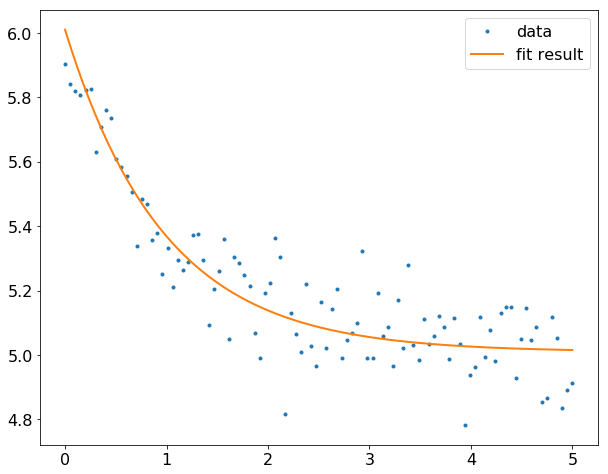

In [17]:
plt.plot(x, y, '.', label='data')
plt.plot(x, f(x, *params), label='fit result')
plt.legend();

With curve_fit
	a = -0.14 ± 0.01
	b =  5.56 ± 0.03
With linregress
	a = -0.14
	b =  5.56


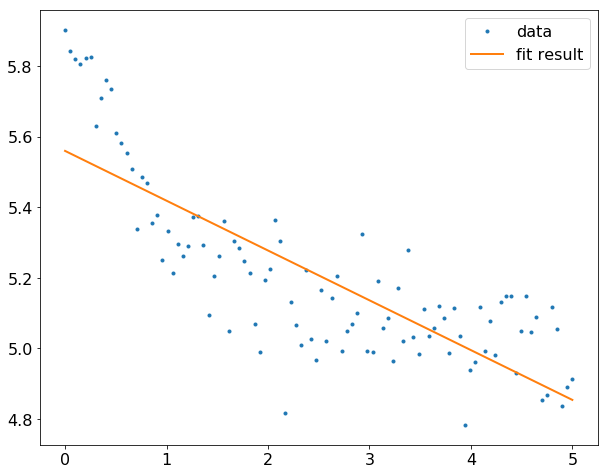

In [36]:
from scipy.stats import linregress

# We can use this method to do a linear regression
def f_linear(x, a, b):
    return a*x + b

l_params, l_covariance_matrix = curve_fit(f_linear, x, y)
l_uncertainties = np.sqrt(np.diag(l_covariance_matrix))

print('With curve_fit')
print('\ta = {:5.2f} ± {:.2f}'.format(l_params[0], l_uncertainties[0]))
print('\tb = {:5.2f} ± {:.2f}'.format(l_params[1], l_uncertainties[1]))

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print('With linregress')
print('\ta = {:5.2f}'.format(slope))
print('\tb = {:5.2f}'.format(intercept))

plt.plot(x, y, '.', label='data')
plt.plot(x, f_linear(x, *l_params), label='fit result')
plt.legend();

<a id=uncertainties_guesses></a>
### Providing uncertainties and initial guesses

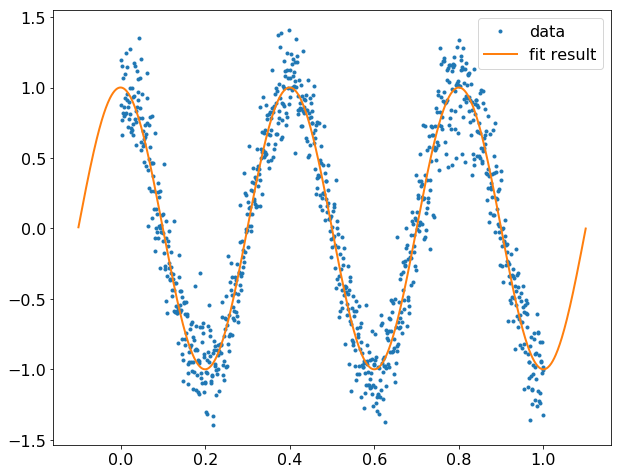

In [50]:
x = np.linspace(0, 1, 1000)
def f(x, a, b):
    return np.sin(a * x + b)

y = f(x, 5 * np.pi, np.pi / 2) 
yerr = np.full_like(y, 0.2)
noise = np.random.normal(0, yerr, 1000)
y += noise


params, covariance_matrix = curve_fit(f, x, y)

params, covariance_matrix = curve_fit(
    f, x, y,
    p0=[15, 2],
)

#params, covariance_matrix = curve_fit(
#    f, x, y,
#    p0=[15, 1.5],
#    sigma=yerr,
#    absolute_sigma=True,
#)


# plot the stuff

x_plot = np.linspace(-0.1, 1.1, 1000)

plt.plot(x, y, '.', label='data')
plt.plot(x_plot, f(x_plot, *params), label='fit result')
plt.legend();

<a id=minimize></a>
## Unbinned likelihood fits using `minimize`

Simple example: an unbinned negative log-likelihood fit for a poissonian distribution

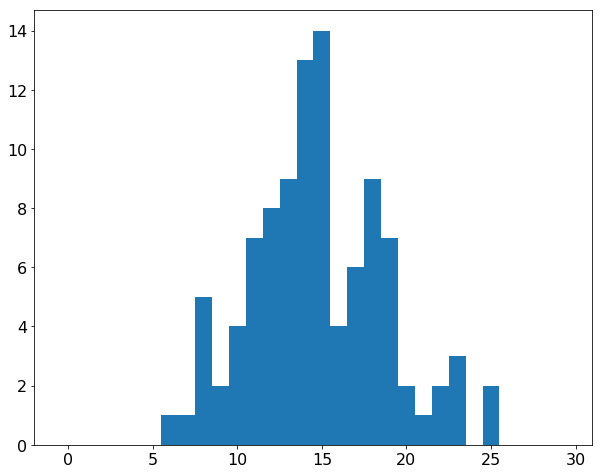

In [3]:
lambda_ = 15
k = np.random.poisson(lambda_, 100)

# make sure to use bins of integer width, centered around the integer
bin_edges = np.arange(0, 31) - 0.5

plt.hist(k, bins=bin_edges);

Poisson pdf:

$$ 
f(k, \lambda) = \frac{\lambda^k}{k!} \mathrm{e}^{-\lambda}
$$

So the likelihood is:

$$
\mathcal{L} = \prod_{i=0}^{N} \frac{\lambda^{k_i}}{k_i!} \mathrm{e}^{-\lambda}
$$

It's often easier to minimize $-\log(\mathcal{L})$, let's see:

$$
-\log(\mathcal{L}) = - \sum_{i=0}^{N}\bigl( k_i \log(\lambda) - \log{k_i!} - \lambda \bigr)
$$

We are interested in the minimum relative to $\lambda$, so we dismiss constant term not concerning $\lambda$ 
$$
-\log(\mathcal{L}) = \sum_{i=0}^{N}\bigl( \lambda - k_i \log(\lambda) \bigr)   
$$

This looks indeed easier to minimize than the likelihood.

In [4]:
from scipy.optimize import minimize

def negative_log_likelihood(lambda_, k):
    return np.sum(lambda_ - k * np.log(lambda_))

result = minimize(
    negative_log_likelihood,
    x0=(10, ),   # initial guess
    args=(k, ),  # additional arguments for the function to minimize
)

result

print('True λ = {}'.format(lambda_))
print('Fit: λ = {:.2f} ± {:.2f}'.format(result.x[0], np.sqrt(result.hess_inv[0, 0])))

True λ = 15
Fit: λ = 14.78 ± 0.38


* minimize has lots of options for different minimization algorithms
* Also able to respect bounds and constraints (with certain algorithms)
* It is worth to write down you problems and simplify the (log)Likelihood as much as possible

<a id=exercise_1></a>
### Exercise 1

Do the same to estimate the parameters of a gaussian distribution.

Generate a sample of a normal distribution with $\mu = 10$ and $\sigma = 6$

pdf:

$$
f(x, \mu, \sigma) =  \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-0.5 \frac{(x - \mu)^2}{\sigma^2}}
$$

Minimize the negative log-likelihood:

$$
-\log(\mathcal{L}) = -\sum_{i = 0}^N \log\bigl( \frac{1}{\sqrt{2 \pi}} \mathrm{e}^{-0.5 \frac{(x_i - \mu)^2}{\sigma^2}}  \bigr)
$$

You can make use of the `norm.rvs` and `norm.pdf` functions to generate the sample and define the function to be minimized.

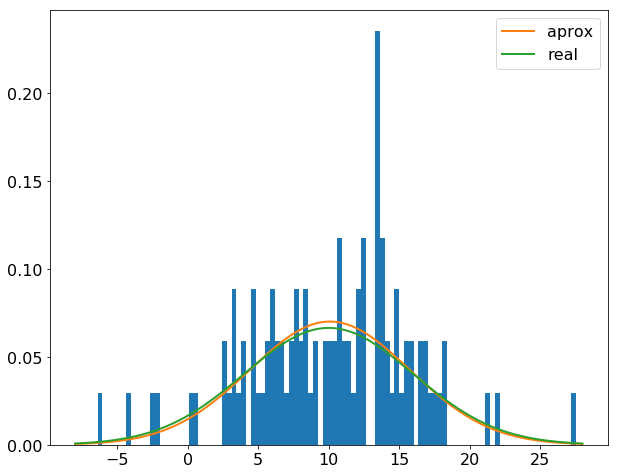

In [21]:
from scipy.stats import norm

x = norm.rvs(loc=10, scale=6, size=100)

def pdf(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

def negative_log_likelihood(params, x):
    mu, sigma = params
    neg_l = -np.sum(np.log(pdf(x, mu, sigma)))
    return neg_l


result = minimize(
    negative_log_likelihood,
    x0=(0., 1.),   # initial guess
    args=(x, ),            # additional arguments for the function to minimize
    bounds=[
        (None, None),      # no bounds for mu
        (1e-32, None)         # sigma > 0
    ],
    method='L-BFGS-B', # method that supports bounds
)

x_plot = np.linspace(-8, 28, 1000)

plt.hist(x, bins=100, normed=True)
plt.plot(x_plot, pdf(x_plot, *result.x), label='aprox')
plt.plot(x_plot, pdf(x_plot, 10., 6.), label='real')
plt.legend()

<a id=fft></a>
# Fast Fourier Transforms (FFTs)

In [38]:
freq1 = 5
freq2 = 50

t = np.linspace(0, 1, 1024*10)
y = np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t)

# add some white noise
y += np.random.normal(y, 5)

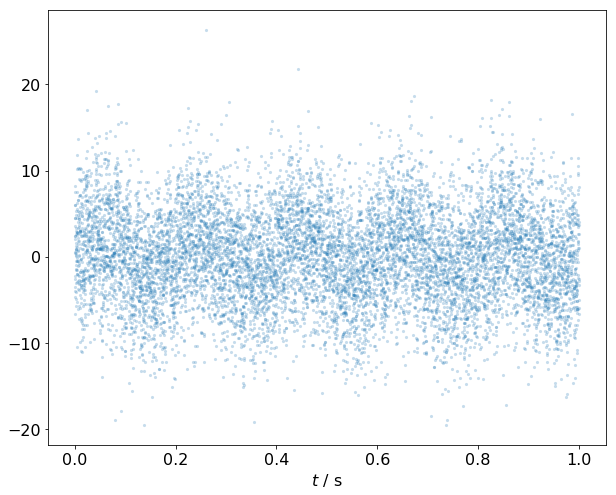

In [39]:
plt.scatter(t, y, s=10, alpha=0.25, lw=0)
plt.xlabel(r'$t \ /\ \mathrm{s}$');

In [36]:
from scipy import fftpack

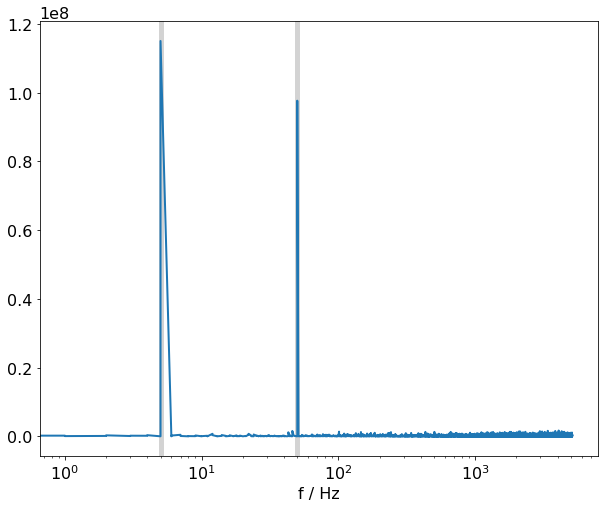

In [45]:
z = fftpack.rfft(y)
f = fftpack.rfftfreq(len(t), t[1] - t[0])

plt.axvline(freq1, color='lightgray', lw=5)
plt.axvline(freq2, color='lightgray', lw=5)

plt.plot(f, z**2) #np.abs(z)**2)

plt.xlabel('f / Hz')
plt.xscale('log')
# plt.yscale('log');

<a id=integration></a>
# Integration

Scipy integration routines are discussed in the [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). We will look at the two most common routines here.

<a id=function_integration></a>
## Function integration

`quad` is used to evaluate definite 1D numerical integrals. For example, assume we want to integrate a quadratic polynomial $f(x) = 3x^2 + 6x - 9$ over an interval $x \in [0, 5]$. Analytically, the answer is:

$$ \int_0^5 3x^2 + 6x - 9 \ dx = \left[ x^3 + 3x^2 - 9x \right]_{x = 0}^{x = 5} = 155 $$

In [ ]:
from scipy.integrate import quad

def f(x):
    return 3*x**2 + 6*x - 9

quad(f, 0, 5)

The first parameter `quad` returns is the answer; the second is an estimate of the absolute error in the result.

For 2D, 3D, or n-dimensional integrals , use `dblquad`, `tplquad`, or `nquad`, respectively.

For some more interesting functions, Scipy's other function integration routines might be helpful:
* `quadrature` : [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature)
* `romberg` : [Romberg integration](https://en.wikipedia.org/wiki/Romberg%27s_method)

For example, consider the $\mathrm{sinc}$ function:

$$
\mathrm{sinc}(x) \equiv
\begin{cases} 
1 & x = 0 \\
\sin(x)/x & \mathrm{otherwise}
\end{cases}
$$

In [ ]:
def sinc(x):
    return np.sin(x) / x


x = np.linspace(-10, 10, 1000)
y = sinc(x)
plt.plot(x, y)
plt.title('Sinc Function')

print(quad(sinc, -10, 10))   # fails

# numpys sinc handles the singularity correctly
print(quad(np.sinc, -10, 10))

`quad` struggles with $\mathrm{sinc}$, but it can be easily handled with Gaussian quadrature:

In [ ]:
from scipy.integrate import quadrature

# quadrature may complain, but it will work in the end
print(quadrature(sinc, -10, 10)[0])

This result agrees with Mathematica to 13 decimal places (even though only 11 are shown). Note that the problem is the singularity at $x=0$; if we change the boundaries to, say, [-10.1, 10], then it works fine. Also, writing our sinc function more cleverly would eliminate the problem.

<a id=sampleintegration></a>
## Sample integration

If you have a collection of points that you want to integrate, you could use an [interpolation function](#interpolation) and pass it to `quad`. A better alternative is to use the purpose-built functions `trapz`, `romb`, and `simps`.

We will consider the $\mathrm{sinc}$ function again as an example. The most naive (and surprisingly robust) integration method is using the trapazoid rule, which is implemented in `trapz`:

In [ ]:
from scipy.integrate import trapz

# 50 grid points
x = np.linspace(-10, 10)
y = sinc(x)
print('  50 points:', trapz(y, x))   # note the order of the arguments: y, x

# 1000 grid points
x = np.linspace(-10, 10, 1000)
y = sinc(x)
print('1000 points:', trapz(y, x))

<a id=interpolation></a>
# Interpolation

<a id=linear_interpolation></a>
## Linear interpolation

Imagine you would like to interpolate between two points $(x_0, y_0)$ and $(x_1, y_1)$. You could do this by hand:

$$y(x) = y_0 + (x - x_0) \frac{y_1 - y_0}{x_1 - x_0}$$

Simple enough, but it is annoying to look up or derive the formula. Also, what if you want values less than $x_0$ to stay at the value of $y_0$, and likewise for values greater than $x_1$? Then you need to add `if` statements, and check the logic, etc. Too much work.

Instead, there is a simple function for almost all of your interpolation needs: `interp1d`.

In [ ]:
from scipy.interpolate import interp1d

x = (1, 2)
y = (5, 7)
print('Points:', list(zip(x, y)))

f = interp1d(x, y)
z = [1.25, 1.5, 1.75]
print('Interpolation:', list(zip(z, f(z))))

Right now, if you try to use an x-coordinate outside of the interval $[x_0, x_1]$, a `ValueError` will be raised:

In [ ]:
# f(2.5)   # uncomment to run me

This is because we haven't told `interp1d` how we want to handle the boundaries. This is done using the `fill_value` keyword argument. There are a few options:

1. Set values outside of the interval $[x_0, x_1]$ to a float.
2. Set values $< x_0$ to `below` and values $> x_1$ to `above` by passing a tuple, `(below, above)`.
3. Extrapolate points outside the interval by passing `extrapolate`.

We also need to tell `interp1d` not to raise a `ValueError` by setting the `bounds_error` keyword to `False`.

In [ ]:
z = [0.5, 1, 1.5, 2, 2.5]

f = interp1d(x, y, bounds_error=False, fill_value=0)
print("Option 1:", list(zip(z, f(z))))

f = interp1d(x, y, bounds_error=False, fill_value=y)   # fill with endpoint values
print("Option 2:", list(zip(z, f(z))))

f = interp1d(x, y, fill_value='extrapolate')   # bounds_error set to False automatically
print("Option 3:", list(zip(z, f(z))))

<a id=spline_interpolation></a>
## Cubic spline interpolation

[Cubic splines](http://mathworld.wolfram.com/CubicSpline.html) are what are most commonly used when you want to interpolate between points *smoothly*.

Cubic spline interpolation is so common, it has its own method, `CubicSpline`, which produces generally better results.

In [ ]:
from scipy.interpolate import CubicSpline

npoints = 5
x = np.arange(npoints)
y = np.random.random(npoints)
plt.plot(x, y, label='linear')

f = interp1d(x, y, kind='cubic')
z = np.linspace(np.min(x), np.max(x), 100)
plt.plot(z, f(z), label='interp1d cubic')

f = CubicSpline(x, y)
z = np.linspace(np.min(x), np.max(x), 100)
plt.plot(z, f(z), label='CubicSpline')

plt.plot(x, y, 'ko')
plt.legend(loc='best');

<a id=special_functions></a>
# Special Functions

A complete list of scipy special functions can be found [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/special.html).

<a id=filtering></a>
# Signal filtering

Consider this noisy data set with outliers. The data is a so-called S-curve, and we want to identify the midpoint of the falling edge.

In [ ]:
from scipy.special import ndtr

def s_curve(x, a, b):
    return ndtr(-a*(x - b))

# generate mildly noisy data using Gaussian CDF (see end of this notebook)
real_params = [2.5, 3]
x = np.linspace(0, 5, 20)
y = s_curve(x, *real_params)
y += np.random.normal(0, 0.025, len(y))

# add 4 bad data points
outlier_xcoords = [2, 6, 10, 15]
y[outlier_xcoords] = np.random.uniform(0.2, 2, size=4)
plt.plot(x, y, 'bo')

# attempt to fit
params, __ = curve_fit(s_curve, x, y)
z = np.linspace(0, 5, 100)
plt.plot(z, s_curve(z, *params), 'k--')
print('Real value:', real_params[1])
print('Fit value:', params[1])

You can see clearly in the data that the mid-point of the S-curve is at about x=3 (which is the real value), but the outliers destroy the fit. We can remove them easily with a median filter. A median filter is particularly suited to edge detection cases, since it tends to preserve edges well.

In [ ]:
from scipy.signal import medfilt

filtered_y = medfilt(y)

params, __ = curve_fit(s_curve, x, filtered_y)
print('Real value:', real_params[1])
print('Fit value:', params[1])

z = np.linspace(0, 5, 100)
plt.plot(x, y, 'k*', label='Before Filtering')
plt.plot(x, filtered_y, 'bo', label='After Filtering')
plt.plot(z, s_curve(z, *params), 'g--')
plt.legend();

## Exercise

The following is an example implementation of a low-pass [Butterworth filter](https://en.wikipedia.org/wiki/Butterworth_filter):

In [ ]:
from scipy.signal import butter, lfilter

def lowpass_filter(data, cutoff, fs, order=5):
    """
    Digital Butterworth low-pass filter.
    
    data   : 1D array of data to be filtered
    cutoff : cutoff frequency in Hz
    fs     : sampling frequency (samples/second)
    """
    nyquist_frequency = fs/2
    normal_cutoff = cutoff/nyquist_frequency
    b, a = butter(order, normal_cutoff, btype='low')
    y = lfilter(b, a, data)
    return y

You are the unfortunate recipient of the following noisy data, which contains noise at two different (unknown) frequencies:

In [ ]:
data = np.genfromtxt('../resources/scipy_filter_data.dat')
t = data[:, 0]
y = data[:, 1]
sample_freq = (len(t) - 1)/(t[-1])
plt.plot(t, y);   # these are your data

Somewhere in this mess is a Gaussian:

In [ ]:
from scipy.stats import norm

def gaussian(x, mu, sigma, A):
    return A * norm.pdf(x, mu, sigma)

Use a FFT to identify the two offending noise frequencies. Then convert the `lowpass_filter` above into a bandstop filter (hint: it is a trivial modification), and remove the offending noise from the data as much as possible (it won't be perfect). Finally, use `curvefit` to fit a Gaussian to the data, thereby recovering the original signal.

In [ ]:
# %load -r 3-52 solutions/07_01_scipy.py

<a id=bessel></a>
## Bessel functions

In [ ]:
from scipy.special import jn

x = np.linspace(0, 10, 100)
for n in range(6):
    plt.plot(x, jn(n, x), label=r'$\mathtt{J}_{%i}(x)$' % n)
plt.grid()
plt.legend();

In [ ]:
import mpl_toolkits.mplot3d.axes3d as plt3d
from matplotlib.colors import LogNorm

def airy_disk(x):
    mask = x != 0
    result = np.empty_like(x)
    result[~mask] = 1.0
    result[mask] = (2 * jn(1, x[mask]) / x[mask])**2
    return result

# 2D plot
r = np.linspace(-10, 10, 500)
plt.plot(r, airy_disk(r))

# 3D plot
x = np.arange(-10, 10.1, 0.1)
y = np.arange(-10, 10.1, 0.1)

X, Y = np.meshgrid(x, y)
Z = airy_disk(np.sqrt(X**2 + Y**2))

result
fig = plt.figure()
ax = plt3d.Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap='gray', norm=LogNorm(), lw=0)

None

<a id=erf></a>
## Error function and Gaussian CDF

CDF = cumulative distribution function

$$\mathrm{erf}(z) = \frac{2}{\sqrt{\pi}} \int_0^z \exp\left( -t^2 \right) dt $$
$$\mathrm{ndtr}(z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^z \exp\left( \frac{-t^2}{2} \right) dt $$

In [ ]:
from scipy.special import erf, ndtr

def gaussian(z):
    return np.exp(-z**2)

x = np.linspace(-3, 3, 100)
plt.plot(x, gaussian(x), label='Gaussian')
plt.plot(x, erf(x), label='Error Function')
plt.plot(x, ndtr(x), label='Gaussian CDF')
plt.ylim(-1.1, 1.1)
plt.legend(loc='best');

<a id=ortho_polys></a>
## Orthogonal Polynomials

In [ ]:
from scipy.special import eval_legendre, eval_laguerre, eval_hermite, eval_chebyt

ortho_poly_dict = {'Legendre': eval_legendre,
                   'Laguerre': eval_laguerre,
                   'Hermite': eval_hermite,
                   'Chebyshev T': eval_chebyt}

def plot_ortho_poly(name):
    plt.figure()
    f = ortho_poly_dict[name]
    x = np.linspace(-1, 1, 100)
    for n in range(5):
        plt.plot(x, f(n, x), label='n = %i' % n)
    if name is 'Legendre' or 'Chebyshev' in name:
        plt.ylim(-1.1, 1.1)
    plt.legend(loc='best', fontsize=16)
    plt.title(name + ' Polynomials')
    
plot_ortho_poly('Legendre')
# plot_ortho_poly('Laguerre')
# plot_ortho_poly('Hermite')
# plot_ortho_poly('Chebyshev T')

## Exercise

Orthogonal polynomials can be used to construct a series expansion of an arbitrary function, just like $\sin$ and $\cos$ are used to construct a Fourier series. For example, we can express a function $f(x)$ as a series of Legendre polynomials $P_n(x)$:

$$ f(x) = \sum_{n=0}^{\infty} a_n P_n(x) $$

The Legendre polynomials are orthogonal on the interval $x \in [-1, 1]$, where they obey the following orthogonality relationship:
$$ \int_{-1}^{1} P_n(x) \, P_m(x) \, dx = \frac{2}{2 m + 1} \delta_{mn} $$

With $f(x) = sin(\pi x)$, write a function to calculate the coefficients $a_n$ of the Legendre series. Then plot $f(x)$ and the Legendre series for $x \in [-1, 1]$. Calculate as many coefficients as are needed for the series to essentially the same as $f(x)$ (it will be less than ten).

If you are struggling with the math, look [here](http://mathworld.wolfram.com/Fourier-LegendreSeries.html).

In [ ]:
# %load -r 57-80 solutions/07_01_scipy.py

## Additional information

#### Fitting with (i)minuit

One of the most extended minimization packages classically used for fitting is [MINUIT](https://en.wikipedia.org/wiki/MINUIT). Python allows to use this software via wrapping the C++ code into a python package named [iminuit](https://github.com/iminuit/iminuit).

For more information see [iminuit documentation](http://iminuit.readthedocs.io/en/latest/), and the [available tutorials](https://github.com/iminuit/iminuit/blob/master/tutorial/tutorial.py) within the GitHub project.



